# 신용카드 사기 검출 Project
https://www.kaggle.com/kartik2112/fraud-detection

In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# 실제 Kaggle상에서 정답을 맞혀볼수는 없어서,Train Set만 활용하여 Split하여 검증을 진행하고자 한다.
df = pd.read_csv('C:/Users/USER/Desktop/Data_projects/CreditCard_Fraud_detection/fraudTrain.csv')

In [3]:
df = df.drop('Unnamed: 0', axis = 1)

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393 

In [7]:
# 잘리는 현상을 막고자 max_columns 값 설정
pd.set_option('display.max_columns', 25)
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## 변수명 정리 
Kaggle 설명을 바탕으로 변수명을 정리하면 다음과 같다.  

- transdatetrans_time : 거래 시간
- cc_num : 카드 번호
- merchant : 거래 발생 가게 이름
- category : 거래 발생 가게 종류
- amt : 거래 금액
- first : 명의자 이름
- last : 명의자 성
- gender : 명의자 성별
- street : 명의자 주소 거리
- city : 명의자 주소 도시
- state : 명의자 주소 주
- zip : 명의자 주소 우편번호
- lat : 명의자 주소 위도
- long : 명의자 주소 경도
- city_pop : 명의자 도시 인구 수
- job : 명의자 직업
- dob : 명의자 생년월일
- trans_num : 거래 번호
- unix_time : 거래 시간(유닉스 시간)
- merch_lat : 거래 상점의 위도
- merch_long : 거래 상점의 경도
- is_fraud  <--- Target Class

## EDA

### 결측치 확인

In [12]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

결측치가 단 하나도 없는 데이터이다.! 와!

### (1) Target_class EDA

In [10]:
df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

Fraud라고 분류된 Target이 극소수로 매우 imbalanced된 데이터임을 알 수 있다.  
따라서 Target들이 가지고 있는 공통점을 찾던가, 유사한 데이터를 만들어주는 SMOTE중 하나를 고민해야 할 것이다.  

### (2) Store EDA

#### Category에 대한 EDA

In [13]:
# category
df.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

업종별로 몇 개의 가게가 해당되는지 fraud/ nonfraud를 나눠 시각화하면 다음과 같다.

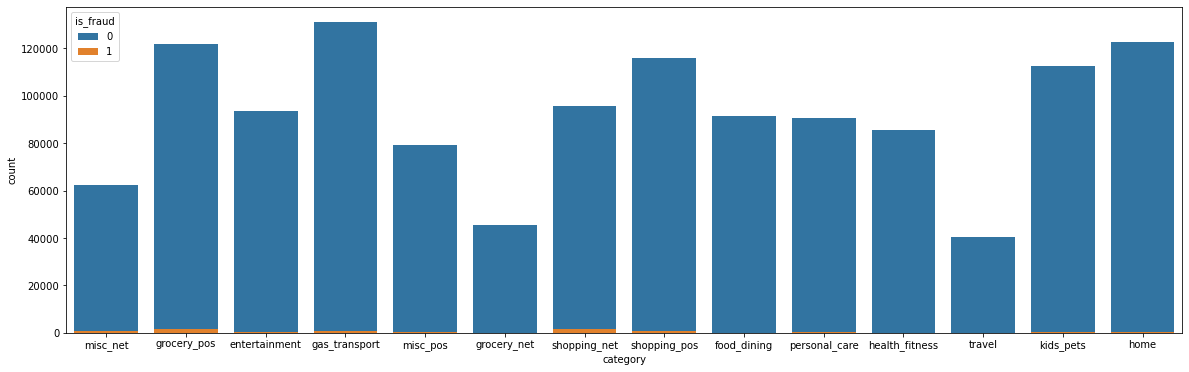

In [35]:
plt.figure(figsize = (20, 6))
sns.countplot(data = df, x = 'category', hue = 'is_fraud', dodge = False)
plt.show()

업종별 fraud 비율을 확인해보려고 한다.

In [51]:
fraud_cnt_category = (df.loc[df.is_fraud == 1]).category.value_counts()
total_cnt_category = (df.category.value_counts())

In [52]:
categories = total_cnt_category.index
rate = []
for c in categories:
    fraud_rate = fraud_cnt_category[c] / total_cnt_category[c] * 100
    rate.append(fraud_rate)

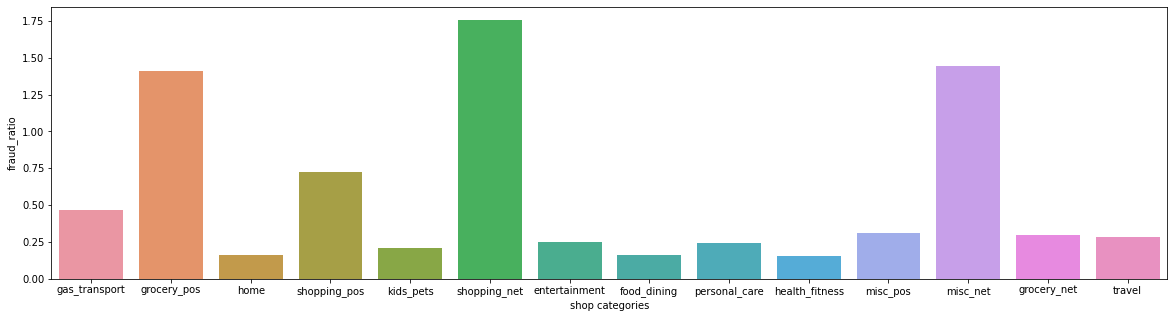

In [56]:
plt.figure(figsize = (20, 5))
sns.barplot(x = categories, y = rate)
plt.xlabel('shop categories')
plt.ylabel('fraud_ratio')
plt.show()

해석 / 업종별로 fraud detection 발생 비율의 차이가 크다. 특히 shopping_net, grocery_pos. misc_net, shopping_pos에서 fraud 발생 비율이상대적으로 더 높음을 알 수 있다.

#### amt

<AxesSubplot:ylabel='amt'>

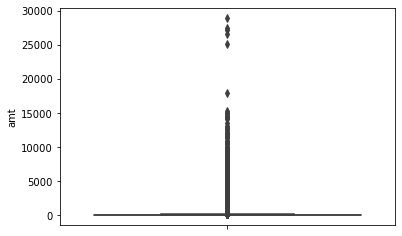

In [69]:
sns.boxplot(y = 'amt', data = df)

### (3) Card-Holder EDA

### (4) Total EDA